In [30]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from skimage.transform import rescale, resize, downscale_local_mean
import numpy as np

In [43]:
digits = datasets.load_digits()

def run_with_hyperparameters(imgs, target, res):
    gamma_lst = [0.02, 0.007, 0.003, 0.0009, 0.0001, 0.0006]
    c_lst = [0.1, 0.3, 0.8, 0.7, 2, 0.4] 

    h_params = [{'gamma':g, 'C':c} for g in gamma_lst for c in c_lst]

    train_f = 0.8
    test_f = 0.1
    dev_f = 0.1

    n_samples = len(imgs)
    data = imgs.reshape((n_samples, -1))

    dev_test_f = 1-train_f
    X_train, X_dev_test, y_train, y_dev_test = train_test_split(
        data, target, test_size=dev_test_f, shuffle=True
    )
    X_test, X_dev, y_test, y_dev = train_test_split(
        X_dev_test, y_dev_test, test_size=(dev_f)/dev_test_f, shuffle=True
    )


    best_accuracy = -1.0
    best_model = None
    best_h_params = None

    best_train_accuracy = -1.0
    best_dev_accuracy = -1.0
    best_test_accuracy = -1.0

    h_param_results = []
    for cur_h_params in h_params:

        clf = svm.SVC()

        hyper_params = cur_h_params
        clf.set_params(**hyper_params)

        clf.fit(X_train, y_train)

        predicted_dev = clf.predict(X_dev)
        predicted_train = clf.predict(X_train)
        predicted_test = clf.predict(X_test)

        cur_acc = metrics.accuracy_score(y_pred=predicted_dev, y_true=y_dev)
        cur_train_acc = metrics.accuracy_score(y_pred=predicted_train, y_true=y_train)
        cur_test_acc = metrics.accuracy_score(y_pred=predicted_test, y_true=y_test)

        h_param_results.append([hyper_params['gamma'], hyper_params['C'], cur_acc, cur_train_acc, cur_test_acc])
        if cur_acc > best_accuracy:
            best_accuracy = cur_acc
            best_dev_accuracy = cur_acc
            best_train_accuracy = cur_train_acc
            best_test_accuracy = cur_test_acc
            best_model = clf
            best_h_params = cur_h_params

    df_h_param_results = pd.DataFrame(h_param_results, columns =['Gamma', 'C', 'Dev_Accuracy', 'Train_Accuracy', 'Test_Accuracy'])
    print("\n================================Hyperparameter and Results==================================================")
    print(df_h_param_results.head(10))

    predicted = best_model.predict(X_test)

    print("\n")    
    print("\n================================Report=====================================================================")
    print(
        f"Classification report for classifier {best_model}:\n"
        f"{metrics.classification_report(y_test, predicted)}\n"
    )

    print("\n") 
    print("\n================================Best hyperparameters and Accuracy===========================================")
    print("Best C:" + str(best_h_params['C']) + " and Gamma:" + str(best_h_params['gamma']) )
    print("Best Dev Accuracy:" + str(best_dev_accuracy))
    print("Best Train Accuracy:" + str(best_train_accuracy))
    print("Best Test Accuracy:" + str(best_test_accuracy))

    print("\n") 
    print("\n================================Predicted Images=============================================================")
    _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    for ax, image, prediction in zip(axes, X_test, predicted):
        ax.set_axis_off()
        image = image.reshape(res, res)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"Prediction: {prediction}")


================================Hyperparameter and Results==================================================
   Gamma    C  Dev_Accuracy  Train_Accuracy  Test_Accuracy
0  0.020  0.1      0.093923        0.108559       0.044693
1  0.020  0.3      0.093923        0.108559       0.044693
2  0.020  0.8      0.104972        1.000000       0.061453
3  0.020  0.7      0.099448        1.000000       0.050279
4  0.020  2.0      0.337017        1.000000       0.312849
5  0.020  0.4      0.093923        0.118998       0.044693
6  0.007  0.1      0.099448        0.113431       0.044693
7  0.007  0.3      0.397790        0.818372       0.418994
8  0.007  0.8      0.917127        1.000000       0.921788
9  0.007  0.7      0.867403        1.000000       0.893855



================================Report=====================================================================
Classification report for classifier SVC(C=0.8, gamma=0.003):
              precision    recall  f1-score   support

           0 

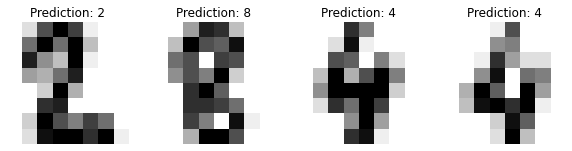

In [26]:
run_with_hyperparameters(digits.images, digits.target, res=8)

In [49]:
print("\n================================Current Image size=============================================================")
print("Current Image size: " + str(digits.images[0].shape))


================================Current Image size=============================================================
Current Image size: (8, 8)


In [45]:
def resize_images(res, imgs):
    print("\n================================Current Image size=============================================================")
    print("Current Image size: " + str(digits.images[0].shape))
    print("\n================================New Image size=============================================================")
    print("Image Resolution: " + '(' + str(res) + ',' + str(res) + ')')
    arr = []
    for im in imgs:
        image_resized = resize(im, (res, res), anti_aliasing=True)
        arr.append(image_resized)
    return np.array(arr)


================================Current Image size=============================================================
Current Image size: (8, 8)

================================New Image size=============================================================
Image Resolution: (6,6)

================================Hyperparameter and Results==================================================
   Gamma    C  Dev_Accuracy  Train_Accuracy  Test_Accuracy
0  0.020  0.1      0.220994        0.285317       0.217877
1  0.020  0.3      0.895028        0.995129       0.865922
2  0.020  0.8      0.944751        1.000000       0.938547
3  0.020  0.7      0.944751        1.000000       0.932961
4  0.020  2.0      0.961326        1.000000       0.955307
5  0.020  0.4      0.922652        0.999304       0.899441
6  0.007  0.1      0.961326        0.976340       0.949721
7  0.007  0.3      0.977901        0.994433       0.977654
8  0.007  0.8      0.988950        0.999304       0.977654
9  0.007  0.7      0.988950

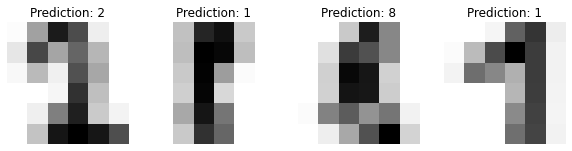

In [46]:
#new resolution 6*6
res = 6
run_with_hyperparameters(resize_images(res,digits.images), digits.target, res)


================================Current Image size=============================================================
Current Image size: (8, 8)

================================New Image size=============================================================
Image Resolution: (12,12)

================================Hyperparameter and Results==================================================
   Gamma    C  Dev_Accuracy  Train_Accuracy  Test_Accuracy
0  0.020  0.1      0.071823        0.105776       0.089385
1  0.020  0.3      0.071823        0.105776       0.089385
2  0.020  0.8      0.077348        1.000000       0.094972
3  0.020  0.7      0.071823        1.000000       0.089385
4  0.020  2.0      0.270718        1.000000       0.301676
5  0.020  0.4      0.071823        0.108559       0.089385
6  0.007  0.1      0.071823        0.106472       0.089385
7  0.007  0.3      0.220994        0.583855       0.273743
8  0.007  0.8      0.767956        1.000000       0.832402
9  0.007  0.7      0.7071

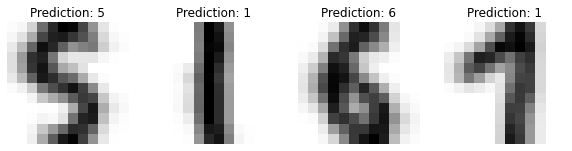

In [47]:
#new resolution 12*12
res = 12
run_with_hyperparameters(resize_images(res,digits.images), digits.target, res)


================================Current Image size=============================================================
Current Image size: (8, 8)

================================New Image size=============================================================
Image Resolution: (18,18)

================================Hyperparameter and Results==================================================
   Gamma    C  Dev_Accuracy  Train_Accuracy  Test_Accuracy
0  0.020  0.1      0.055249        0.107168       0.094972
1  0.020  0.3      0.055249        0.107168       0.094972
2  0.020  0.8      0.055249        1.000000       0.094972
3  0.020  0.7      0.055249        1.000000       0.094972
4  0.020  2.0      0.055249        1.000000       0.094972
5  0.020  0.4      0.055249        0.107168       0.094972
6  0.007  0.1      0.055249        0.107168       0.094972
7  0.007  0.3      0.055249        0.107168       0.094972
8  0.007  0.8      0.093923        1.000000       0.094972
9  0.007  0.7      0.0773

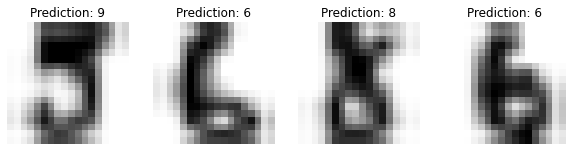

In [48]:
#new resolution 18*18
res = 18
run_with_hyperparameters(resize_images(res,digits.images), digits.target, res)